In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


chosen_cmap = matplotlib.cm.get_cmap('Paired')

C:\Users\Asus\AppData\Local\Temp\ipykernel_11476\1572461599.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  chosen_cmap = matplotlib.cm.get_cmap('Paired')


In [50]:
# df = pd.read_excel('../../All Responses.xlsx')
df = pd.read_excel('All Responses.xlsx')

In [51]:
# df.iloc[:, 3:13] # SUS - NT
# df.iloc[:, 14:17] # TLX - NT
df.iloc[:, 17:29] # Stats - NT

# df.iloc[:, 29:39] # SUS - NT
# df.iloc[:, 40:43] # TLX - NT

,Does the expanded note match with your writing style?,How satisfied are you with the expanded note?,What do you think about the quality of the expanded note?,How satisfied are you with the generated cue questions?,What do you think about the generated cue questions?,How satisfied are you with the generated personal summary?,What do you think about the quality of the generated summary?,How satisfied are you with the ‘order by theme’ functionality?,What do you think about the ‘order by theme’ functionality?,What do you like or not like about the system?,Would you be interested in using noteeline in the future?,How do you imagine yourself using this tool?
0,3,6,The expanded note had more detail (esp extrane...,5,I wasn't sure whether the cue questions were g...,5,The summary is very functional and addresses w...,2,It may be because the themes were aligned by t...,I like that it allows for some amount of simpl...,Yes,I would often use it for annotating or taking ...
1,7,7,good. it captures the main theme and the lengt...,5,1. how the questions were generated. answering...,7,would be better to mark which part is from the...,5,this feature is good but this particular resul...,1. The sidebar could be shrinked\n2. edit butt...,Yes,learn a new thing (e.g. lecture/researching a ...
2,6,7,Good quality,7,I love them,3,"Quality is good, but summary is too long and n...",5,It's a helpful feature to take structured notes,I like how you have the video on top and note ...,Yes,I watch a lot of financial videos like financi...
3,6,7,Pretty high--had granular details and numbers ...,6,I think they were specific enough so that I co...,6,Lessened numeric/granular details while preser...,7,"Themes were readable, modifiable, and the drag...",I think this system was nice in the sense that...,Yes,I'd use it to watch academic material that tea...
4,5,5,"I found the quality to be pretty high level, e...",7,"Since it was immediately after the video, I di...",7,"It was great, often times you need to revise n...",4,Would be helpful to mark connections between n...,I liked the minimalistic flow that I had to ta...,Yes,"Taking notes, while doing almost all online re..."
5,5,6,I think the quality of the expanded note is pr...,6,I enjoyed being able to see the generated cue ...,5,I think the generated summary did what it was ...,7,"I really enjoyed the ""order by theme"" function...",Likes: being able to take notes without thinki...,Yes,"In school (watching recorded lectures), in mee..."
6,7,7,"I think it's pretty nice. \nFirst of all, it r...",6,"I only answered one question, so not sure. but...",7,The most point I felt successful in the summar...,7,This is the way I try to document my notes so ...,Like : overall fuction especially the <order b...,Yes,I think mostly the videos which needs document...
7,4,5,Expanded notes were mostly good and expanded o...,5,The questions were good. Some questions had ve...,6,The summary was comprehensive and covered most...,7,I really liked the order by theme functionalit...,I liked the overall summary and the order by t...,Yes,"Yes, I can imagine using this for a longer lec..."
8,5,5,I think the quality of the expanded note was g...,6,The cue questions were pretty relevant to the ...,5,It was a good summary and felt like something ...,6,"I liked the chunking a lot, personally that's ...",I'm wondering about the storing of notes over ...,Yes,I would likely use this tool for longer videos...
9,6,7,"very detailed, concise, and grammatically correct",6,Alternative (wrong) answers are well-written. ...,7,Sentences are very long (not in a bad way) but...,6,Useful for topics that are vastly different fr...,could have more options for personal preferenc...,Yes,"For institutional education, I'd use it for in..."


In [54]:
# 17:29
df = pd.read_excel('All Responses.xlsx')
grouped_data = df.groupby(df.iloc[:, 17]).size()
# Reset the index to turn the series into a DataFrame
grouped_df = grouped_data.reset_index(name='Style Match')
print(grouped_df)

grouped_data = df.groupby(df.iloc[:, 18]).size()
# Reset the index to turn the series into a DataFrame
grouped_df = grouped_data.reset_index(name='note')
# print(grouped_df)

grouped_data = df.groupby(df.iloc[:, 20]).size()
# Reset the index to turn the series into a DataFrame
grouped_df = grouped_data.reset_index(name='cue')
# print(grouped_df)

grouped_data = df.groupby(df.iloc[:, 22]).size()
# Reset the index to turn the series into a DataFrame
grouped_df = grouped_data.reset_index(name='summary')
# print(grouped_df)

grouped_data = df.groupby(df.iloc[:, 24]).size()
# Reset the index to turn the series into a DataFrame
grouped_df = grouped_data.reset_index(name='theme')
# print(grouped_df)

   Does the expanded note match with your writing style?  Style Match
0                                                  3                1
1                                                  4                1
2                                                  5                4
3                                                  6                3
4                                                  7                3


C:\Users\Asus\AppData\Local\Temp\ipykernel_7624\2873276419.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  chosen_cmap = matplotlib.cm.get_cmap('RdYlBu')


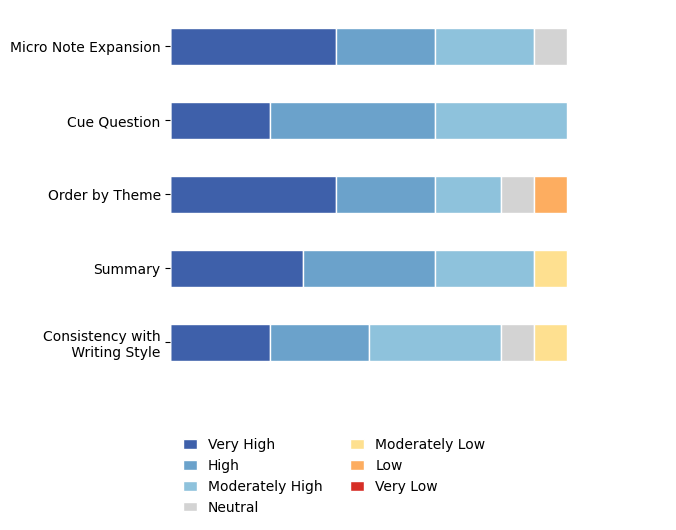

In [55]:
SMALL_SIZE = 10
MEDIUM_SIZE = 20
BIGGER_SIZE = 26

# Set font sizes
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

chosen_cmap = matplotlib.cm.get_cmap('RdYlBu')
colors = [chosen_cmap(i) for i in [0.93, 0.82, 0.75, 0.5, 0.4, 0.3, 0.1]] 
colors[3] = 'lightgrey'

# Let's assume your DataFrame 'df' is structured as follows:
# Each row corresponds to a feature (like "Understand Relationships", "Locate Entities", etc.)
# Each column corresponds to a Likert scale response ("Strongly Agree", "Agree", "Neutral", "Disagree", "Strongly Disagree")

# Sample data for illustration purposes:
data = {
    'Feature': [
        'Micro Note Expansion', 'Cue Question', 'Order by Theme', 'Summary', 'Consistency with\n Writing Style'
    ],
    # 7 
    'Very High': [5, 3, 5, 4, 3],
    # 6 
    'High': [3, 5, 3, 4, 3],
    # 5 
    'Moderately High': [3, 4, 2, 3, 4],
    # 4
    'Neutral': [1, 0, 1, 0, 1],
    # 3
    'Moderately Low': [0, 0, 0, 1, 1],
    # 2
    'Low': [0, 0, 1, 0, 0],
    # 1
    'Very Low': [0, 0, 0, 0, 0],
}
df = pd.DataFrame(data)

# Set the 'Feature' column as the index
df.set_index('Feature', inplace=True)

# Plot a horizontal stacked bar chart
ax = df.plot(kind='barh', stacked=True, color=colors, edgecolor='white')

ax.set_xlim(0, 15)  # Assuming the Likert scale ranges from 0 to 7
ax.invert_yaxis()  
# ax.set_xlabel('Number of Responses')
# ax.set_title('Participants\' Responses to Utility and Usability')
# ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.legend(loc="lower left", ncol=2, bbox_to_anchor=(0, -0.4), handlelength=1, frameon=False) # https://stackoverflow.com/a/54870844
plt.xticks([])  
# plt.yticks([])  
plt.ylabel('')
# plt.tight_layout()  # Adjust layout to fit everything
plt.box(False)
# Save the plot to a file
plt.savefig('likert_scale_responses.pdf', bbox_inches="tight")
# Show the plot
plt.show()


In [56]:
# Sample data
name = ['Note Taking Tool',        # Level 0
        'Manual Note Taking',    # Level 1
        'Note Taking using AI',    # Level 1
        'Macbook Note',     
        'Notion',      
        'Google Doc',  
        'Pen and Paper',
        'Screenshot',
        'Drawing',
        'ProCreate',
        'ChatGPT',
        'Notion AI',
        'FigJam AI',
        'Whisper',
        'Otter.ai',
        'Zoom AI',
        'Gemini']  

parent = ['',          # Root has no parent
          'Note Taking Tool',      # Level 1
          'Note Taking Tool',      # Level 1
          'Manual Note Taking',  
          'Manual Note Taking',  
          'Manual Note Taking',   
          'Manual Note Taking',   
          'Manual Note Taking',   
          'Manual Note Taking',
          'Manual Note Taking',
          'Note Taking using AI',
          'Note Taking using AI',
          'Note Taking using AI',
          'Note Taking using AI',
          'Note Taking using AI',
          'Note Taking using AI',
          'Note Taking using AI',
         ]    

size = [0,
        0,
        0,
        9,
        8,
        4,
        7,
        1,
        2,
        1,
        4,
        3,
        1,
        3,
        1,
        1,
        1
    ]

In [57]:
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'iframe'

text = [f'Participant\nCount: ({s})' for n, s in zip(name, size)]
colors = [
    'lightgrey', 'skyblue', 'orange'
]

#create plotly figure
import plotly
fig = plotly.graph_objs.Figure()
fig.add_trace(plotly.graph_objs.Treemap(
    labels = name,
    parents = parent,
    values = size,
    textinfo="label+value",
    textfont=dict(size=28),  # Adjust font size and color for readability
    tiling=dict(pad=0),  # Set padding to 0 for tight layout
    marker=dict(colors=colors)
))

#show figure
fig.show()
# fig.write_image("Tool_use.pdf")

fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
)

# Save the figure with no extra whitespace
fig.write_image("Tool_use.pdf", scale=1)
# fig.write_image("Tool_use.pdf", scale=1, width=1980, height=1020)

# plotly.offline.plot(fig, filename='lifeExp.html')

In [72]:
# df.iloc[:, 3:13] # SUS - NT
# df.iloc[:, 13:17] # TLX - NT
# df.iloc[:, 17:29] # Stats - NT

# df.iloc[:, 29:39] # SUS - bl
df.iloc[:, 39:43] # TLX - bl

""
Feature
Micro Note Expansion
Cue Question
Order by Theme
Summary
Consistency with\n Writing Style


In [67]:
sus_noteline = df.iloc[:, 3:13].values.flatten()
sus_baseline = df.iloc[:, 29:39].values.flatten()
tlx_noteline = df.iloc[:, 13:17].values.flatten()
tlx_baseline = df.iloc[:, 39:43].values.flatten()

In [70]:
print(np.mean(sus_noteline), np.std(sus_noteline))
print(np.mean(sus_baseline), np.std(sus_baseline))

0.3 0.45825756949558394
nan nan


In [ ]:
# https://builtin.com/data-science/shapiro-wilk-test
from scipy.stats import shapiro
# print(shapiro(sus_noteline))
print(shapiro(sus_baseline-sus_noteline))
# print(shapiro(tlx_noteline))
print(shapiro(tlx_noteline-tlx_baseline))

In [80]:
df

,Very High,High,Moderately High,Neutral,Moderately Low,Low,Very Low
Feature,,,,,,,
Micro Note Expansion,5,3,3,1,0,0,0
Cue Question,3,5,4,0,0,0,0
Order by Theme,5,3,2,1,0,1,0
Summary,4,4,3,0,1,0,0
Consistency with\n Writing Style,3,3,4,1,1,0,0


In [ ]:
import numpy as np
from scipy import stats 
from scipy import stats as st
# https://www.pythonpool.com/t-test-in-python/ 
# print(st.ttest_ind(a=sus_noteline, b=sus_baseline, equal_var=True))
print('sus', st.ttest_rel(a=sus_noteline, b=sus_baseline))
# print(st.ttest_ind(a=tlx_noteline, b=tlx_baseline, equal_var=True))
print('tlx', st.ttest_rel(a=tlx_noteline, b=tlx_baseline))

In [79]:
# chosen_cmap = matplotlib.cm.get_cmap('Paired')
sus_baseline

array([], dtype=float64)

In [ ]:
data = [sus_noteline, sus_baseline]

SMALL_SIZE = 16
MEDIUM_SIZE = 17
BIGGER_SIZE = 26

# Set font sizes
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(3,7))
bp = ax.boxplot(data, patch_artist=True, notch=False, positions=[1, 2], widths=0.3)

# Setting colors for the box plot
colors = [chosen_cmap(1), chosen_cmap(8)]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Optionally, customize the colors of other components as well
for element in ['whiskers', 'caps', 'medians', 'fliers']:
    plt.setp(bp[element], color='black')

colors = [chosen_cmap(1), chosen_cmap(8)]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Adding the p-value and range line
x1, x2 = 1, 2   # These are in 'figure coordinates'.
y, h, col = np.max(np.concatenate(data)) + 0.1, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "p = 0.957", ha='center', va='bottom', color=col, fontsize=SMALL_SIZE)

ax.set_xticklabels(['NoTeeline', 'Baseline'])
ax.set_ylabel('Usability')
plt.savefig('sus.pdf', bbox_inches="tight")
plt.show()


In [ ]:
data = [tlx_noteline, tlx_baseline]

fig, ax = plt.subplots(figsize=(3, 7))
bp = ax.boxplot(data, patch_artist=True, notch=False, positions=[1, 2], widths=0.3)

# Setting colors for the box plot
colors = [chosen_cmap(3), chosen_cmap(9)]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Optionally, customize the colors of other components as well
for element in ['whiskers', 'caps', 'medians', 'fliers']:
    plt.setp(bp[element], color='black')

colors = [chosen_cmap(3), chosen_cmap(9)]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Adding the p-value and range line
x1, x2 = 1, 2   # These are in 'figure coordinates'.
y, h, col = np.max(np.concatenate(data)) + 0.1, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "p = 3.56e-05", ha='center', va='bottom', color=col, fontsize=SMALL_SIZE)

ax.set_xticklabels(['NoTeeline', 'Baseline'])
ax.set_ylabel('Workload')
plt.savefig('tlx.pdf', bbox_inches="tight")
plt.show()


In [72]:
import os
import json
import pandas as pd

userlog_path = "UserLog"
baseline = []
noteeline = []

# for user_folder in os.listdir(userlog_path):
for folder_number in range(1, 13):
    user_folder = f'P{folder_number}'
    print(f'Processing {user_folder}')
    user_data = {}
    user_folder_path = os.path.join(userlog_path, user_folder)
    if os.path.isdir(user_folder_path):
        folder_number = int(user_folder[1:])
        # if folder_number % 2 == 0:
        for subdir, _, files in os.walk(user_folder_path):
            for file in files:

                str_rep = ''
                
                file_path = os.path.join(subdir, file)
                if file.lower().startswith('video1') or file.lower().startswith('video2'):
                    video_data = {}
                    vd_data = {}
                    with open(file_path, 'r', encoding='utf-8') as f:
                        bullet_points_data = json.load(f)

                    start = bullet_points_data['editHistory'][1]['utc_time']
                    # mx = -1
                    # mx = max(eh['edit'][-1][-1]['e_time'] for eh in bullet_points_data['editHistory'])
                    # end = bullet_points_data['editHistory'][-1]['edit'][-1][0]['e_time']
                    end = bullet_points_data['editHistory'][-2]['utc_time']
                    # end = mx

                    diff = end - start

                    if folder_number % 2 == 0:
                        if file.lower().startswith('video1'): 
                            baseline.append(diff)
                        elif file.lower().startswith('video2'): 
                            noteeline.append(diff)
                    else:
                        if file.lower().startswith('video1'): 
                            noteeline.append(diff)
                        elif file.lower().startswith('video2'): 
                            baseline.append(diff)


Processing P1
Processing P2
Processing P3
Processing P4
Processing P5
Processing P6
Processing P7
Processing P8
Processing P9
Processing P10
Processing P11
Processing P12


In [73]:
nt = [x/1000 for x in noteeline]
bs = [x/1000 for x in baseline]

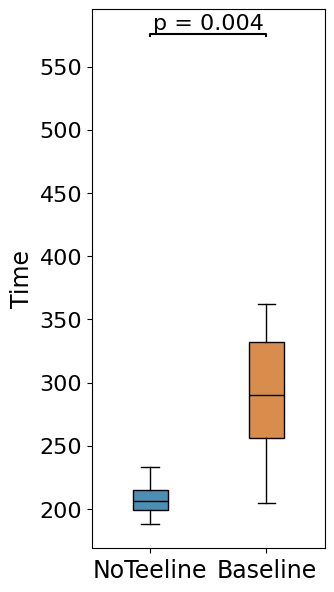

In [92]:
data = [nt, bs]

SMALL_SIZE = 16
MEDIUM_SIZE = 17
BIGGER_SIZE = 26

# Set font sizes
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(3,7))
bp = ax.boxplot(data, patch_artist=True, notch=False, positions=[1, 2], widths=0.3, showfliers=False)

# Setting colors for the box plot
colors = [(76/255, 142/255, 180/255), (217/255, 141/255, 76/255)]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Optionally, customize the colors of other components as well
for element in ['whiskers', 'caps', 'medians', 'fliers']:
    plt.setp(bp[element], color='black')

colors = [(76/255, 142/255, 180/255), (217/255, 141/255, 76/255)]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Adding the p-value and range line
x1, x2 = 1, 2   # These are in 'figure coordinates'.
y, h, col = np.max(np.concatenate(data)) + .1, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "p = 0.004", ha='center', va='bottom', color=col, fontsize=SMALL_SIZE)

ax.set_xticklabels(['NoTeeline', 'Baseline'])
ax.set_ylabel('Time')
plt.savefig('time.pdf', bbox_inches="tight")
plt.show()


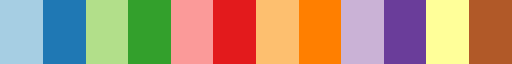

In [77]:
chosen_cmap

In [75]:
from scipy import stats as st

print(st.ttest_rel(a=bs, b=nt))

TtestResult(statistic=3.5987426961861124, pvalue=0.004179120704916992, df=11)


In [68]:
import os
import json
import pandas as pd

userlog_path = "UserLog"
baseline = []
noteeline = []

# for user_folder in os.listdir(userlog_path):
for folder_number in range(1, 13):
    user_folder = f'P{folder_number}'
    print(f'Processing {user_folder}')
    user_data = {}
    user_folder_path = os.path.join(userlog_path, user_folder)
    if os.path.isdir(user_folder_path):
        folder_number = int(user_folder[1:])
        # if folder_number % 2 == 0:
        for subdir, _, files in os.walk(user_folder_path):
            for file in files:

                str_rep = ''
                
                file_path = os.path.join(subdir, file)
                if file.lower().startswith('video2'):
                    video_data = {}
                    vd_data = {}
                    with open(file_path, 'r', encoding='utf-8') as f:
                        bullet_points_data = json.load(f)

                    start = bullet_points_data['editHistory'][1]['utc_time']
                    mx = -1
                    mx = max(eh['edit'][-1][-1]['e_time'] for eh in bullet_points_data['editHistory'])
                    # end = bullet_points_data['editHistory'][-1]['edit'][-1][0]['e_time']
                    end = mx

                    diff = end - start

                    if folder_number % 2 == 0:
                        noteeline.append(diff)
                    else:
                        baseline.append(diff)


Processing P1
Processing P2
Processing P3
Processing P4
Processing P5
Processing P6
Processing P7
Processing P8
Processing P9
Processing P10
Processing P11
Processing P12


In [69]:
nt = [x/1000 for x in noteeline]
bs = [x/1000 for x in baseline]

In [46]:
nt

[296.913, 313.948, 261.467, 289.145, 615.481, 283.992]

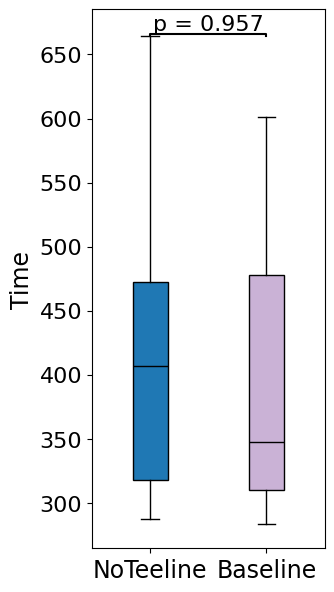

In [70]:
data = [nt, bs]

SMALL_SIZE = 16
MEDIUM_SIZE = 17
BIGGER_SIZE = 26

# Set font sizes
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(3,7))
bp = ax.boxplot(data, patch_artist=True, notch=False, positions=[1, 2], widths=0.3, showfliers=False)

# Setting colors for the box plot
colors = [chosen_cmap(1), chosen_cmap(8)]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Optionally, customize the colors of other components as well
for element in ['whiskers', 'caps', 'medians', 'fliers']:
    plt.setp(bp[element], color='black')

colors = [chosen_cmap(1), chosen_cmap(8)]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Adding the p-value and range line
x1, x2 = 1, 2   # These are in 'figure coordinates'.
y, h, col = np.max(np.concatenate(data)) + .1, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "p = 0.957", ha='center', va='bottom', color=col, fontsize=SMALL_SIZE)

ax.set_xticklabels(['NoTeeline', 'Baseline'])
ax.set_ylabel('Time')
plt.savefig('time.pdf', bbox_inches="tight")
plt.show()


In [71]:
from scipy import stats as st

print(st.ttest_rel(a=bs, b=nt))

TtestResult(statistic=-1.032783757835737, pvalue=0.3490488184317124, df=5)


In [58]:
noteeline

[296913, 313948, 261467, 289145, 615481, 283992]

In [59]:
baseline

[333952, 345222, 272012, 394388, 348832, 250738]